In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('auto-mpg.csv')
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
dataset.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [4]:
dataset[dataset.horsepower.str.isdigit()==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [8]:
dataset['horsepower'] = dataset['horsepower'].replace('?', np.nan)
dataset.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [9]:
dataset.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [10]:
dataset['horsepower'] = dataset['horsepower'].fillna(dataset['horsepower'].median())
dataset.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [11]:
dataset['horsepower'] = dataset['horsepower'].astype('float64')

In [12]:
dataset.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

C:\Users\rahul\AppData\Local\Temp\ipykernel_18356\3001812268.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['mpg'], color='red')
C:\Users\rahul\AppData\Local\Temp\ipykernel_18356\3001812268.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['cylinders'], color='blue')
C:\Us

<AxesSubplot: xlabel='origin', ylabel='Density'>

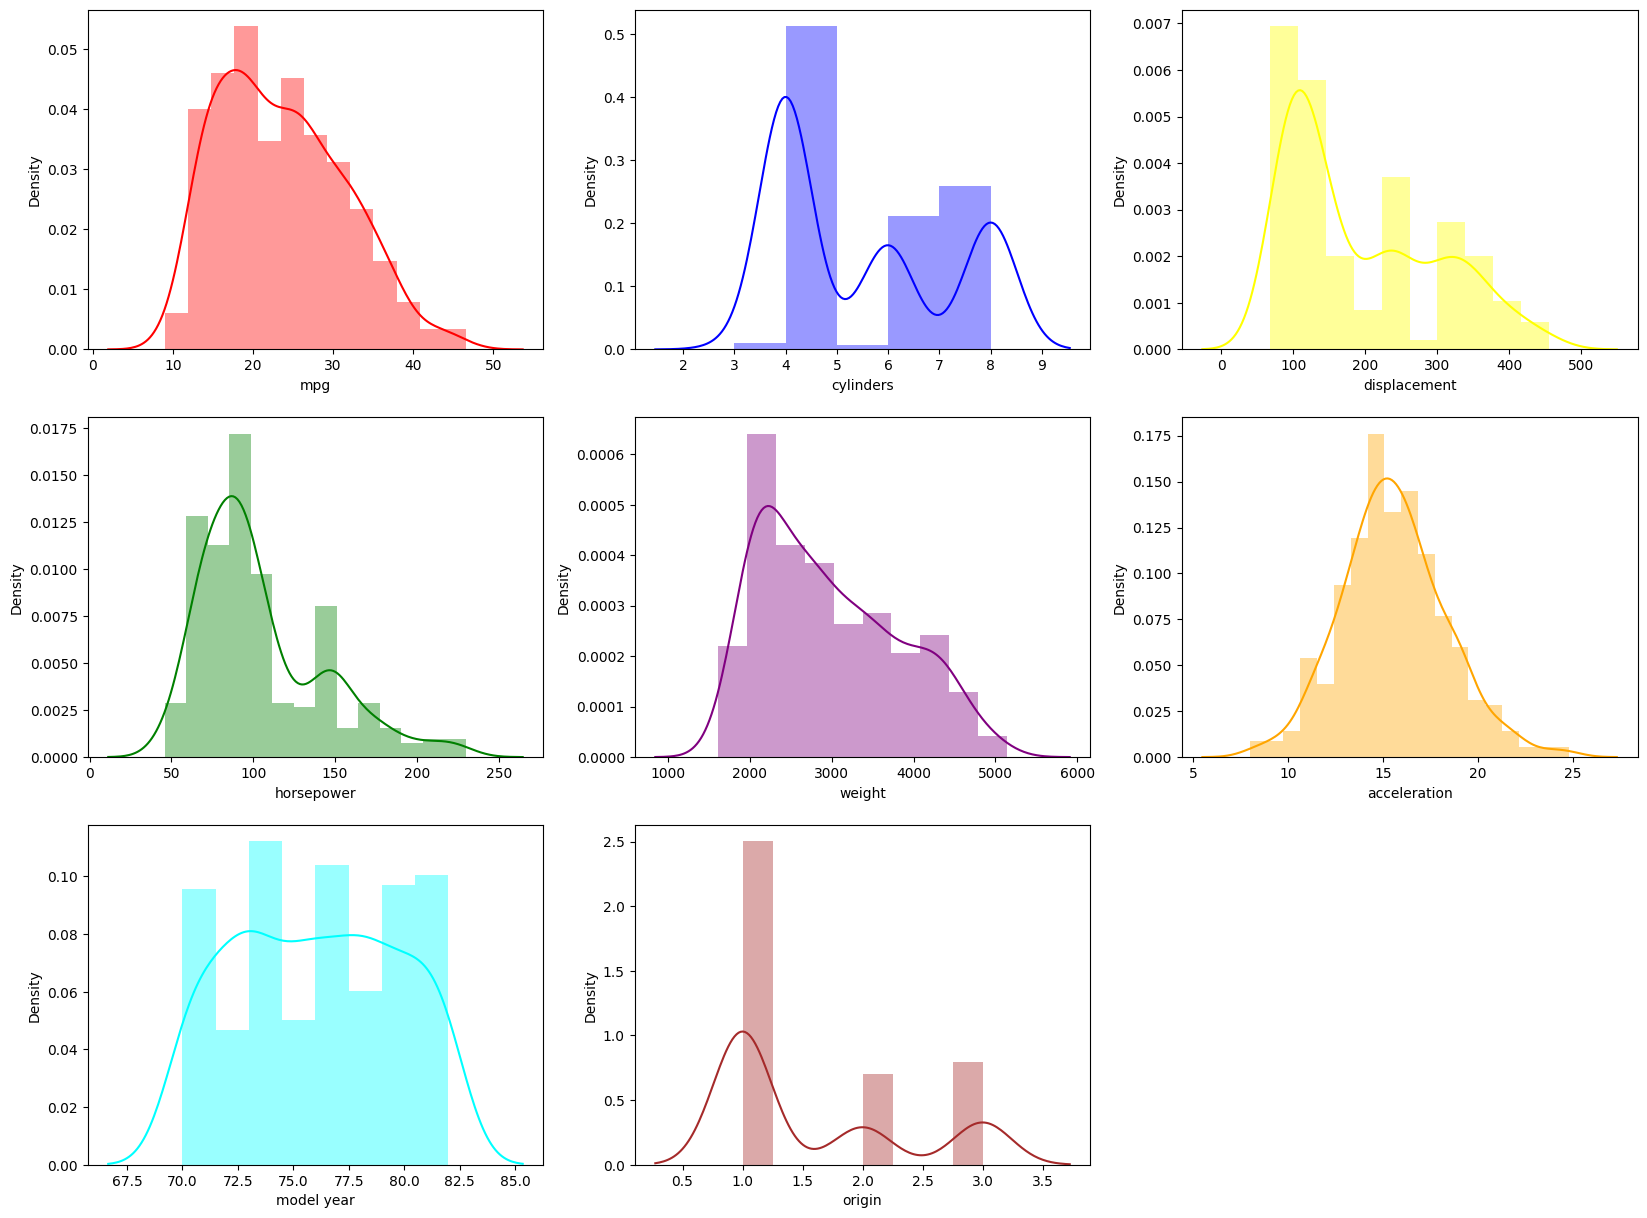

In [13]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.distplot(dataset['mpg'], color='red')

plt.subplot(3,3,2)
sns.distplot(dataset['cylinders'], color='blue')

plt.subplot(3,3,3)
sns.distplot(dataset['displacement'], color='yellow')

plt.subplot(3,3,4)
sns.distplot(dataset['horsepower'], color='green')

plt.subplot(3,3,5)
sns.distplot(dataset['weight'], color='purple')

plt.subplot(3,3,6)
sns.distplot(dataset['acceleration'], color='orange')

plt.subplot(3,3,7)
sns.distplot(dataset['model year'], color='cyan')

plt.subplot(3,3,8)
sns.distplot(dataset['origin'], color='brown')

In [14]:
dataset.corr().T

C:\Users\rahul\AppData\Local\Temp\ipykernel_18356\3942607939.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr().T


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


In [15]:
dataset = dataset.drop('car name', axis=1)

In [16]:
X = dataset.drop('mpg', axis=1)
y = dataset[['mpg']]

In [17]:
X_scaled = scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

y_scaled = scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=1)

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)

ridge = Ridge(alpha=5, max_iter=100, tol=0.1)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.1, max_iter=100, tol=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=100, tol=0.1)

In [20]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.8081802739111359, 0.8472274567567305)

In [21]:
ridge.score(X_train, y_train), ridge.score(X_test, y_test)

(0.8061462968640183, 0.8483609760332925)

In [22]:
lasso.score(X_train, y_train), lasso.score(X_test, y_test)

(0.7801687815827953, 0.8236178667546322)